<a href="https://colab.research.google.com/github/Lupaes/on34-python-s17-s18-projeto-final/blob/main/Projeto_Final_LuanaPaes_e_D%C3%A1lliaReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Neste projeto trabalharemos com os microdados do ENEM do ano de 2023 disponiblizado pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - Inep.

A base utilzada e o dicionário de dados estão disponíveis no link abaixo:

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Serão analisados apenas os incritos do sexo feminino das regiões Norte e Sul do Brasil.


O projeto tem como objetivo analisar se há diferenças significatvas entre as inscritas dos extremos do país.

## Importação, filtragem e exportação dos dados

In [ ]:
#importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib as plt
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Acessando o drive com pasta onde contém o arquivo dos dados

with zipfile.ZipFile('/content/drive/MyDrive/microdados_enem_2023.zip') as z:
  print(*z.namelist(), sep="\n")

PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2023_P1_CAD_01_DIA_1_AZUL.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_04_DIA_1_ROSA_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_04_DIA_1_ROSA_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_06_DIA_2_CINZA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_07_DIA_2_AZUL.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_08_DIA_2_ROSA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_08_DIA_2_ROSA_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_08_DIA_2_ROSA_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_09_DIA_1_LARANJA_BRAILE_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2023_P1_CAD_09_DIA_1_LARANJA_LEITOR_TELA_DOSVOX_CH.txt
PROVAS E GABARITOS/ENEM_2023_P1_CAD_09_DIA_1_LARANJA_LEITOR_TELA_DOSVOX_LC.txt
PROVAS E GABARITOS/ENEM_2023_P1_CAD_09_DIA_1_LARANJA_LEITOR_TELA_NVDA_CH.pdf
PROVAS E GABARITOS/ENEM_20

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/microdados_enem_2023.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2023.csv') as f:
    df = pd.read_csv(f, sep=';' , encoding='ISO-8859-1')

In [ ]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [ ]:
# Salvando na variável 'columns' apenas as colunas que serão utilizadas na análise.

columns = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
        'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA','TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q006']

Lendo o arquivo apenas com as colunas desejadas, usando 'usecols' e salvando no dataframe 'df_enem'

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/microdados_enem_2023.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2023.csv') as f:
    df_enem = pd.read_csv(f, sep=';' , encoding='ISO-8859-1', usecols=columns)


Visto que, para esta análise tomaremos como base apenas as regiões Norte e Sul do Brasil, faremos um filtro pelos estados de prova e salvaremos em um novo Dataframe.

In [ ]:
# salvando as siglas dos estados da regão norte e sul em variáveis para usarmos no filtro

estados_norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
estados_sul = ['PR', 'SC', 'RS']
estados_norte_sul = estados_norte + estados_sul

In [ ]:
# gerando um novo dataframe apenas com os estados desejados

df_norte_sul = df_enem[df_enem['SG_UF_PROVA'].isin(estados_norte_sul)]

In [ ]:
#Criaremos uma nova coluna chamada 'REGIAO' defininiremos inicialmente o valor como 'Norte'

df_norte_sul['REGIAO'] = 'Norte'

# Atualizando os valores da coluna 'REGIAO' para 'Sul' onde as siglas dos estados correspondem a região Sul

df_norte_sul.loc[df_norte_sul['SG_UF_PROVA'].isin(estados_sul), 'REGIAO'] = 'Sul'

In [ ]:
df_norte_sul

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q006,REGIAO
2,210061103945,6,F,1,1,1,0,Caxias do Sul,RS,1,...,1,502.0,498.9,475.6,363.2,1,1.0,700.0,C,Sul
11,210060801595,3,M,3,2,2,0,Ubiratã,PR,1,...,1,608.2,667.6,607.9,691.9,0,1.0,780.0,D,Sul
16,210058061534,4,F,1,2,2,0,Belém,PA,1,...,1,515.7,553.1,544.4,437.0,0,1.0,880.0,B,Norte
18,210058387328,11,M,1,1,1,0,Londrina,PR,1,...,1,571.3,574.7,613.3,719.7,0,1.0,560.0,D,Sul
24,210059388088,3,F,1,1,1,0,Maringá,PR,1,...,1,540.5,632.5,542.8,575.3,0,1.0,880.0,E,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933947,210061965965,9,M,1,1,1,0,Rio Grande,RS,0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,Sul
3933948,210061959674,3,M,1,2,2,0,São Leopoldo,RS,1,...,1,476.2,542.9,545.2,530.5,0,1.0,600.0,F,Sul
3933949,210061959675,6,F,3,1,1,0,Igrejinha,RS,0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,F,Sul
3933950,210061959676,12,M,1,1,1,0,Cachoeirinha,RS,1,...,1,566.2,605.6,613.7,547.3,0,1.0,540.0,F,Sul


In [ ]:
# Separando apenas os inscritos do sexo feminino das regiões Norte e Nordeste

df_feminino_norte_sul = df_norte_sul[df_norte_sul['TP_SEXO'] == 'F']

In [ ]:
#Exportando a base que será usada nas próximas análises

df_feminino_norte_sul.to_csv('enem_feminino_norte_sul_2023.csv', index=False)

## Importação, limpeza e tratamento dos dados

Para facilitar, importaremos a base filtrada por sexo e região.

In [ ]:
enem_feminino_norte_sul = pd.read_csv('enem_feminino_norte_sul_2023.csv' , sep=',' , encoding='latin-1', on_bad_lines='warn')


In [ ]:
enem_feminino_norte_sul.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'Q006', 'REGIAO'],
      dtype='object')

In [ ]:
# RENOMEANDO ALGUMAS COLUNAS
enem_feminino_norte_sul = enem_feminino_norte_sul.rename(columns={
'IN_TREINEIRO': 'INSCRITOS_TREINEIRO' ,
'NO_MUNICIPIO_PROVA': 'MUNICIPIO_PROVA' ,
'TP_PRESENCA_CN': 'TP_PRESENCA_CIENCIAS_NATUREZA' ,
'TP_PRESENCA_CH': 'TP_PRESENCA_CIENCIAS_HUMANAS' ,
'TP_PRESENCA_LC': 'TP_PRESENCA_LIGUAGENS_CODIGOS' ,
'TP_PRESENCA_MT': 'TP_PRESENCA_MATEMATICA' ,
'NU_NOTA_CN': 'NOTA__CIENCIAS_NATUREZA' ,
'NU_NOTA_CH': 'NOTA_CIENCIAS_HUMANAS' ,
'NU_NOTA_LC': 'NOTA__LIGUAGENS_CODIGOS' ,
'NU_NOTA_MT': 'NOTA_MATEMATICA' ,
'TP_LINGUA': 'TP_LINGUA_ESTRANGEIRA',
'NU_NOTA_REDACAO': 'NOTA_REDACAO' ,
'Q006': 'RENDA_FAMILIAR' })

Nesta fase iremos substituir alguns valores da base, de acordo com o Dicionário de Dados disponiblizado também pelo Inep.
O objetivo dessa substituição é deixar a visualização e contagem dos dados mais clara.

Segue abaixo um exemplo de legenda contida no dicionário:
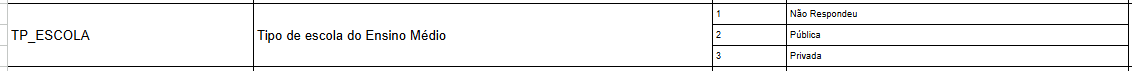

In [ ]:
enem_feminino_norte_sul['TP_ESCOLA'] = enem_feminino_norte_sul['TP_ESCOLA'].replace({
    1: 'nao respondeu',
    2: 'publica',
    3: 'privada' })

In [ ]:
enem_feminino_norte_sul['INSCRITOS_TREINEIRO'] = enem_feminino_norte_sul['INSCRITOS_TREINEIRO'].replace({
0: 'Nao',
1: 'Sim' })

In [ ]:
enem_feminino_norte_sul['TP_FAIXA_ETARIA'] = enem_feminino_norte_sul['TP_FAIXA_ETARIA'].replace({
  1: 'menor de 17',
  2: 17,
  3: 18,
  4: 19,
  5: 20,
  6: 21,
  7: 22,
  8: 23,
  9: 24,
  10: 25,
  11: '26-30',
  12: '31-35',
  13: '36-40',
  14: '41-45',
  15: '46-50',
  16: '51-55',
  17: '56-60',
  18: '61-65',
  19: '66-70',
  20: 'maior de 70' })

In [ ]:
enem_feminino_norte_sul['TP_COR_RACA'] = enem_feminino_norte_sul['TP_COR_RACA'].replace({
  0: 'Não declarado',
  1: 'Branca',
  2: 'Preta',
  3: 'Parda',
  4: 'Amarela',
  5: 'Indígena',
  6: 'Não dispõe da informação' })

In [ ]:
enem_feminino_norte_sul['TP_ST_CONCLUSAO'] = enem_feminino_norte_sul['TP_ST_CONCLUSAO'].replace({
1: 'Concluido' ,
2: 'A concluir em 2023',
3: 'A concluir após 2023' ,
4: 'Não cursando' })

In [ ]:
colunas_para_alterar = ['TP_PRESENCA_CIENCIAS_NATUREZA' ,'TP_PRESENCA_CIENCIAS_HUMANAS', 'TP_PRESENCA_LIGUAGENS_CODIGOS', 'TP_PRESENCA_MATEMATICA']

In [ ]:
enem_feminino_norte_sul[colunas_para_alterar] = enem_feminino_norte_sul[colunas_para_alterar].replace({
  0: 'Faltou' ,
  1: 'Presente' ,
  2: 'Eliminado' })

In [ ]:
enem_feminino_norte_sul['TP_LINGUA_ESTRANGEIRA'] = enem_feminino_norte_sul['TP_LINGUA_ESTRANGEIRA'].replace({
0: 'Ingles',
1: 'Espanhol' })

In [ ]:
enem_feminino_norte_sul['TP_STATUS_REDACAO'] = enem_feminino_norte_sul['TP_STATUS_REDACAO'].replace({
1: 'Sem problemas',
2: 'Anulada' ,
3: 'Cópia Texto Motivador' ,
4: 'Em Branco',
6: 'Fuga ao tema',
7: 'Não atendimento ao tipo textual',
8: 'Texto insuficiente',
9: 'Parte desconectada' })

In [ ]:
enem_feminino_norte_sul['RENDA_FAMILIAR'] = enem_feminino_norte_sul['RENDA_FAMILIAR'].replace({
'A': 'Nenhuma Renda',
'B': 'Até 1.320,00',
'C': '1.320,01 - 1.980,00',
'D': '1.980,01 - 2.640,00',
'E': '2.640,01 - 3.300,00',
'F': '3.300,01 - 3.960,00',
'G': '3.960,01 - 5.280,00',
'H': '5.280,01 - 6.600,00',
'I': '6.600,01 - 7.920,00',
'J': '7.920,01 - 9.240,00',
'K': '9.240,01 - 10.560,00',
'L': '10.560,01 - 11.880,00',
'M': '11.880,01 - 13.200,00',
'N': '13.200,01 - 15.840,00',
'O': '15.840,01 - 19.800,00',
'P': '19.800,01 - 26.400,00',
'Q': 'Acima de 26.400,00' })

In [ ]:
enem_feminino_norte_sul

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,INSCRITOS_TREINEIRO,MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CIENCIAS_NATUREZA,...,TP_PRESENCA_MATEMATICA,NOTA__CIENCIAS_NATUREZA,NOTA_CIENCIAS_HUMANAS,NOTA__LIGUAGENS_CODIGOS,NOTA_MATEMATICA,TP_LINGUA_ESTRANGEIRA,TP_STATUS_REDACAO,NOTA_REDACAO,RENDA_FAMILIAR,REGIAO
0,210061103945,21,F,Branca,Concluido,nao respondeu,Nao,Caxias do Sul,RS,Presente,...,Presente,502.0,498.9,475.6,363.2,Espanhol,Sem problemas,700.0,"1.320,01 - 1.980,00",Sul
1,210058061534,19,F,Branca,A concluir em 2023,publica,Nao,BelÃ©m,PA,Presente,...,Presente,515.7,553.1,544.4,437.0,Ingles,Sem problemas,880.0,"Até 1.320,00",Norte
2,210059388088,18,F,Branca,Concluido,nao respondeu,Nao,MaringÃ¡,PR,Presente,...,Presente,540.5,632.5,542.8,575.3,Ingles,Sem problemas,880.0,"2.640,01 - 3.300,00",Sul
3,210058061536,19,F,Parda,Concluido,nao respondeu,Nao,Marituba,PA,Presente,...,Presente,592.9,624.0,676.4,731.8,Ingles,Sem problemas,880.0,"Até 1.320,00",Norte
4,210059980946,19,F,Branca,Concluido,nao respondeu,Nao,BelÃ©m,PA,Presente,...,Presente,632.0,688.4,635.8,709.6,Ingles,Sem problemas,940.0,"9.240,01 - 10.560,00",Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536951,210061965960,20,F,Branca,Concluido,nao respondeu,Nao,Cachoeirinha,RS,Presente,...,Presente,497.5,446.2,359.6,602.1,Ingles,Sem problemas,800.0,"7.920,01 - 9.240,00",Sul
536952,210061965962,17,F,Branca,A concluir em 2023,privada,Nao,CapÃ£o da Canoa,RS,Presente,...,Presente,444.0,511.4,514.8,444.9,Ingles,Sem problemas,600.0,"9.240,01 - 10.560,00",Sul
536953,210061965964,31-35,F,Branca,Concluido,nao respondeu,Nao,Porto Alegre,RS,Presente,...,Presente,568.6,605.2,598.2,496.8,Ingles,Sem problemas,500.0,"1.980,01 - 2.640,00",Sul
536954,210061959675,21,F,Parda,Concluido,nao respondeu,Nao,Igrejinha,RS,Faltou,...,Faltou,NaN,NaN,NaN,NaN,Ingles,NaN,NaN,"3.300,01 - 3.960,00",Sul


# Análise dos dados

In [ ]:
enem_feminino_norte_sul.isnull().sum()

,0
NU_INSCRICAO,0
TP_FAIXA_ETARIA,0
TP_SEXO,0
TP_COR_RACA,0
TP_ST_CONCLUSAO,0
TP_ESCOLA,0
INSCRITOS_TREINEIRO,0
MUNICIPIO_PROVA,0
SG_UF_PROVA,0
TP_PRESENCA_CIENCIAS_NATUREZA,0


In [ ]:
enem_feminino_norte_sul['TP_PRESENCA_CIENCIAS_NATUREZA'].value_counts()

,count
TP_PRESENCA_CIENCIAS_NATUREZA,
Presente,355849
Faltou,180850
Eliminado,257


In [ ]:
enem_feminino_norte_sul['TP_PRESENCA_CIENCIAS_HUMANAS'].value_counts()

,count
TP_PRESENCA_CIENCIAS_HUMANAS,
Presente,377619
Faltou,158801
Eliminado,536


In [ ]:
enem_feminino_norte_sul['TP_PRESENCA_MATEMATICA'].value_counts()

,count
TP_PRESENCA_MATEMATICA,
Presente,355849
Faltou,180850
Eliminado,257


In [ ]:
enem_feminino_norte_sul['TP_STATUS_REDACAO'].isnull().sum()

159337

Obs: Os dados nulos da coluna TP_STATUS_REDACAO indicam que o inscrito não fez a prova, uma vez que no dicionário de dados, há uma descrição para cada status de entrega/correção da redação, por isso iremos substituir os valores nulos pelo valor "Faltou".

In [ ]:
enem_feminino_norte_sul['TP_STATUS_REDACAO'] = enem_feminino_norte_sul['TP_STATUS_REDACAO'].fillna('Faltou')


De acordo com a análise realizada, pudemos observar que os dados contabilizados nulos das colunas de Notas, correspondem aos números de faltantes + eliminados das colunas TP_PRESENÇA. Ressaltamos que a princípio manteramos os dados nulos, pois a elimação dos menos poderá acarretar uma distorção da nossa análise.

**Questões Norteadoras**

## Identificar qual o percentual de inscritos do sexo feminino por região.

Objetivo: Identifcar o percentual de inscrição feminina em cada região e compará-los entre as regiões(Norte x Sul).

In [ ]:
contagem_fem_por_regiao = enem_feminino_norte_sul.groupby('REGIAO')['NU_INSCRICAO'].count()
contagem_fem_por_regiao

,NU_INSCRICAO
REGIAO,
Norte,278371
Sul,258585


In [ ]:
total_insc_por_regiao = df_norte_sul.groupby('REGIAO')['NU_INSCRICAO'].count()
total_insc_por_regiao

,NU_INSCRICAO
REGIAO,
Norte,453454
Sul,417688


In [ ]:
# Encontrando o percentual de inscrições femininas por região

percentual_feminino_por_regiao = (contagem_fem_por_regiao / total_insc_por_regiao) * 100
percentual_feminino_por_regiao.round(2)

,NU_INSCRICAO
REGIAO,
Norte,61.39
Sul,61.91


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Percentual de inscrição feminina por Região')

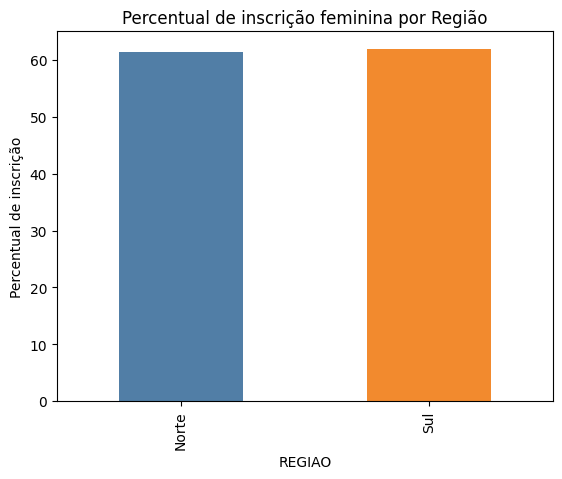

In [ ]:
grafico_cor = ['#517EA6', '#F28A2E']
percentual_feminino_por_regiao.plot(kind='bar', color=grafico_cor)
plt.ylabel('Percentual de inscrição')
plt.title('Percentual de inscrição feminina por Região')

Isso indica que 61,39% das inscrições na região Norte são de mulheres e que 61,91% das inscrições na região Sul são de mulheres. Em ambas as regiões o perceuntal de inscrição feminina para o ENEM 2023, foi superior ao percentual masculino.


## Identificar o percentual de falta nas regiões Norte e Sul. Levaremos em consideração quem faltou em pelos menos uma das provas, incluindo Redação.

Objetivo: comparar se há diferença discrepante entre as duas regiões.

In [ ]:
# Criando uma coluna que verifica se a pessoa faltou em pelo menos uma das provas ou redação
copia_fem_norte_sul['FALTOU_PELO_MENOS_UMA'] = copia_fem_norte_sul[[
    'TP_PRESENCA_CIENCIAS_NATUREZA',
    'TP_PRESENCA_CIENCIAS_HUMANAS',
    'TP_PRESENCA_LIGUAGENS_CODIGOS',
    'TP_PRESENCA_MATEMATICA',
    'TP_STATUS_REDACAO']].apply(lambda x: (x == 'Faltou').any(), axis=1)


In [ ]:
# Calculando o numero de mulheres faltantes por região. O codigo conta apenas as entradas que são True

faltaram_por_regiao = copia_fem_norte_sul.groupby('REGIAO')['FALTOU_PELO_MENOS_UMA'].sum()
faltaram_por_regiao

,FALTOU_PELO_MENOS_UMA
REGIAO,
Norte,102606
Sul,79942


In [ ]:
# Usaremos a variavel de contagem feminina criada anteriormente para calcular o percentual

percentual_faltas_por_regiao = (faltaram_por_regiao / contagem_fem_por_regiao) * 100
percentual_faltas_por_regiao.round(2)

,0
REGIAO,
Norte,36.86
Sul,30.92


Text(0.5, 1.0, 'Percentual de Faltas por Região')

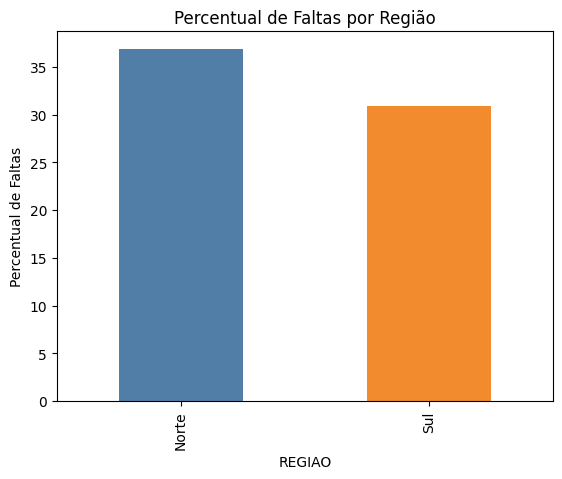

In [ ]:
grafico_cor = ['#517EA6', '#F28A2E']
percentual_faltas_por_regiao.plot(kind='bar', color=grafico_cor)
plt.ylabel('Percentual de Faltas')
plt.title('Percentual de Faltas por Região')

Podemos verificar que o percentual de faltas entre as inscritas na região Norte foi um pouco superior a região Sul. A região Norte teve 36,86% de faltas, enquanto que a região Sul teve um percentual de 30,92% de inscritas faltantes.

## Identificar qual o top 100 de maiores notas entre todas as provas, incluindo Redação e visualizar em qual faixa de renda familiar está a maioria destes Top 100. Também verificar como o Top 100 está distribuido por região(Norte e Sul).

Objetivo: visualizar se há uma possível relação entre as notas mais altas das inscritas x renda familiar e região.

Para  esta análise levaremos em consideração apenas quem realizou todas a provas, dessa forma, faremos a limpeza dos dados nulos que constam nas colunas de nota.

In [ ]:
df_notas_sem_null = copia_fem_norte_sul.dropna()

In [ ]:
# Criando uma nova coluna - 'SOMA_DE_NOTAS'

df_notas_sem_null['SOMA_DE_NOTAS'] = df_notas_sem_null['NOTA__CIENCIAS_NATUREZA'] + df_notas_sem_null['NOTA_CIENCIAS_HUMANAS'] + df_notas_sem_null['NOTA__LIGUAGENS_CODIGOS'] + df_notas_sem_null['NOTA_MATEMATICA'] + df_notas_sem_null['NOTA_REDACAO']

In [ ]:
# Ordenando o dataframe pelas maiores notas, em ordem decrescrente
df_ordenado = df_notas_sem_null.sort_values(by='SOMA_DE_NOTAS', ascending=False)

# Separando as 100 maiores notas no dataframe 'top_100"
top_100 = df_ordenado.head(100)

In [ ]:
# Agrupar os 100 melhores por faixa de renda

distribuicao_renda_top_100 = top_100.groupby('RENDA_FAMILIAR')['NU_INSCRICAO'].count()

distribuicao_renda_top_100

,NU_INSCRICAO
RENDA_FAMILIAR,
"1.320,01 - 1.980,00",1
"10.560,01 - 11.880,00",3
"11.880,01 - 13.200,00",7
"13.200,01 - 15.840,00",11
"15.840,01 - 19.800,00",6
"19.800,01 - 26.400,00",10
"2.640,01 - 3.300,00",1
"3.300,01 - 3.960,00",3
"3.960,01 - 5.280,00",10


In [ ]:
distribuicao_renda_top_100_ordenado = distribuicao_renda_top_100.sort_values(ascending=True)

Text(0.5, 1.0, 'Distribuição do Top 100 maiores notas x Faixa de Renda')

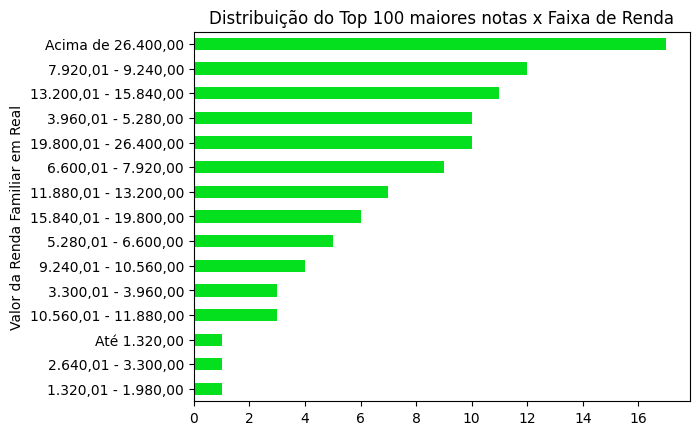

In [ ]:
distribuicao_renda_top_100_ordenado.plot(kind='barh', color='#04E01D')  #006400  #'#04E01D'
plt.ylabel('Valor da Renda Familiar em Real')
plt.title('Distribuição do Top 100 maiores notas x Faixa de Renda')

In [ ]:
# Agrupando os top 100 por região
top_100_por_regiao = top_100.groupby('REGIAO')['NU_INSCRICAO'].count()

In [ ]:
top_100_por_regiao

,NU_INSCRICAO
REGIAO,
Norte,7
Sul,93


Text(0.5, 1.0, 'Distribuição das melhores notas por Região')

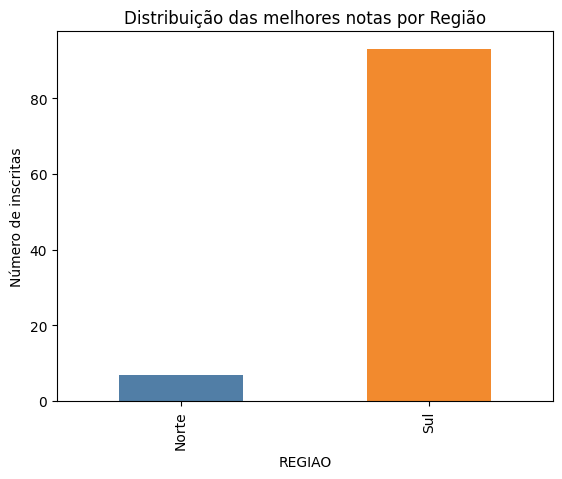

In [ ]:
top_100_por_regiao.plot(kind='bar', color =grafico_cor)
plt.ylabel('Número de inscritas')
plt.title('Distribuição das melhores notas por Região')

Podemos observar que a faixa de renda familiar  acima de R$26.400,00 é onde contém o maior número de inscritas que tiveram as maiores notas, em compensação
existe uma representação mínima entre as menores faixas de renda familar.
Ao levar essa comparação para região, e observar a quantidade de inscrita que cada região obteve entre as 100 melhores notas, é gritante a diferença entre as melhores colocadas por região.

In [ ]:
# EXPORTANDO A BASE FINAL
copia_fem_norte_sul.to_csv('base_final_enem_2023.csv', index=False)